In [1]:
!pip install kmodes
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pickle
import time
import seaborn as sns
%matplotlib inline

In [2]:
# Individuos = pd.read_csv(r'C:\Users\jlope\Documents\IPCM_2021\IPCM-2021\Modelos\Inputs\BDIndividuosTotal.csv',decimal=',')
# Organizaciones = pd.read_csv(r'C:\Users\jlope\Documents\IPCM_2021\IPCM-2021\Modelos\Inputs\BDOrganizacionesTotal.csv',decimal=',')
Individuos = pd.read_csv(r'C:/Users/jlope/Documents/Maestría en Ingeniería - Analítica/Tesis/Modelos/BDIndividuosTotal.csv',decimal=',')
Organizaciones = pd.read_csv(r'C:/Users/jlope/Documents/Maestría en Ingeniería - Analítica/Tesis/Modelos/BDOrganizacionesTotal.csv',decimal=',')
Individuos

,S_1,I_6,I_7,I_8,I_9,I_10,I_19,I_21_1,I_21_2,I_21_3,...,I_91_10,I_30,I_41,I_44,I_45,I_47,Condiciones Territoriales,Prácticas,Efectos,IPCM
0,1,Femenino,1985,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,Si,No,Si,Si,Mejorado,0.361794798490289,0.387014340398247,0.44463337516526,0.4
1,1,Masculino,1953,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,...,Si,Si,Si,Si,No,Mejorado,0.327151236848329,0.461778890169669,0.238168161836116,0.33
2,1,Femenino,1970,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,No,No,No,No,...,No,Si,No,No,No,Empeorado,0.299800315453029,0.372016686965189,0.673631667238401,0.42
3,1,Femenino,1989,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,Si,No,Si,No,Mejorado,0.558784023179863,0.633541759101517,0.323002606500402,0.49
4,1,Femenino,1953,Mestizo,Ninguno,Ninguno,Si,No,No,No,...,No,No,No,Si,No,Permanecen iguales,0.250182909249344,0.521447482222032,0.238168161836116,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,12,Hombre,1999,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,Si,No,No,No,Permanecen iguales,0.21317564171051,0.439428896142171,0.30527580531839,0.305801439570261
11357,12,Hombre,1994,Mestizo,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,No,Permanecen iguales,0.194827985413158,0.879479847931544,0.315275008033687,0.378026512143469
11358,12,Hombre,1968,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,Si,No,Si,No,Permanecen iguales,0.532416558719664,0.481449785781779,0.311142120812354,0.430447761005128
11359,12,Hombre,1998,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,No,Mejorado,0.548475866469842,0.593568976891309,0.354381149153931,0.486817792953296


In [3]:
Individuos = Individuos[['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10',
          "I_19",	"I_21_1",	"I_21_2",	"I_21_3", "I_22",	"I_23",	"I_24",	"I_26_1",	"I_26_2","I_26_3", "I_27",	"I_28_1", "I_29",
          "I_32",	"I_33",	"I_40_1", "I_40_2", "I_40_3", "I_40_4", "I_40_5",	"I_90_1", "I_90_2","I_90_3","I_90_4","I_90_5","I_90_6","I_90_7",
          "I_90_8","I_90_9","I_90_10",
          "I_31",	"I_35_1", "I_38",	"I_51_2", "I_51_3",	"I_51_4",	"I_52",	"I_54", "I_55",	"I_48_1", "I_48_2", "I_48_3", "I_48_4", "I_48_5",
          "I_48_6","I_48_7","I_48_8","I_48_9", "I_91_1","I_91_2","I_91_3","I_91_4","I_91_5","I_91_6","I_91_7","I_91_8","I_91_9","I_91_10",
          "I_30",	"I_41",	"I_44",	"I_45","I_47",
          'IPCM']]
# Individuos['I_7'] = Individuos['I_7'].replace(np.nan, 9999, regex=True)
# Individuos['I_8'] = Individuos['I_8'].replace(np.nan, 'Sin registro', regex=True)
# Individuos['I_24'] = Individuos['I_24'].replace(-88, 'Sin registro', regex=True)
# Individuos['I_35_1'] = Individuos['I_35_1'].replace(np.nan, 'Sin registro', regex=True)
# Individuos['I_47'] = Individuos['I_47'].replace(np.nan, 'Sin registro', regex=True)
# Individuos['IPCM'] = Individuos['IPCM'].replace(np.nan, 0.0, regex=True)
# Individuos = Individuos.dropna()
# Individuos.to_excel('IndividuosIPCM.xlsx', index=False)
Individuos

,S_1,I_6,I_7,I_8,I_9,I_10,I_19,I_21_1,I_21_2,I_21_3,...,I_91_7,I_91_8,I_91_9,I_91_10,I_30,I_41,I_44,I_45,I_47,IPCM
0,1,Femenino,1985,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,No,No,No,Si,No,Si,Si,Mejorado,0.4
1,1,Masculino,1953,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,...,Si,No,No,Si,Si,Si,Si,No,Mejorado,0.33
2,1,Femenino,1970,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,No,No,No,No,...,No,Si,No,No,Si,No,No,No,Empeorado,0.42
3,1,Femenino,1989,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,Si,No,No,Si,No,Si,No,Mejorado,0.49
4,1,Femenino,1953,Mestizo,Ninguno,Ninguno,Si,No,No,No,...,No,Si,No,No,No,No,Si,No,Permanecen iguales,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,12,Hombre,1999,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,Si,No,No,No,Permanecen iguales,0.305801439570261
11357,12,Hombre,1994,Mestizo,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,No,No,No,No,Permanecen iguales,0.378026512143469
11358,12,Hombre,1968,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,Si,No,Si,No,Permanecen iguales,0.430447761005128
11359,12,Hombre,1998,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,No,No,No,No,Mejorado,0.486817792953296


In [4]:
Ind = np.array(Individuos.drop(['IPCM'],1))
feature_names = Individuos.drop(['IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
ordinalEncoder = OrdinalEncoder(categories="auto", dtype=np.float64)
ordinalEncoder.fit(Ind)
Ind = ordinalEncoder.transform(Ind)
Ind = pd.DataFrame(Ind, columns=feature_names)
Ind['IPCM'] = Individuos['IPCM'].astype('float')
Ind['IPCM'] = Ind['IPCM'].replace(np.nan, 0.0, regex=True)
# X['IPCM'].isnull().sum()

C:\Users\jlope\AppData\Local\Temp/ipykernel_16124/1076487801.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Ind = np.array(Individuos.drop(['IPCM'],1))
C:\Users\jlope\AppData\Local\Temp/ipykernel_16124/1076487801.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feature_names = Individuos.drop(['IPCM'],1)


In [5]:
    km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(Ind.iloc[:,1:])
    Ind["Clase"] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3770, cost: 288525.0
Run 1, iteration: 2/100, moves: 1358, cost: 288145.0
Run 1, iteration: 3/100, moves: 156, cost: 288145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2425, cost: 287357.0
Run 2, iteration: 2/100, moves: 30, cost: 287357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3896, cost: 290338.0
Run 3, iteration: 2/100, moves: 1196, cost: 288608.0
Run 3, iteration: 3/100, moves: 1472, cost: 287010.0
Run 3, iteration: 4/100, moves: 329, cost: 287014.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3958, cost: 292140.0
Run 4, iteration: 2/100, moves: 1231, cost: 290484.0
Run 4, iteration: 3/100, moves: 1180, cost: 288949.0
Run 4, iteration: 4/100, moves: 1064, cost: 2881

C:\Users\jlope\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


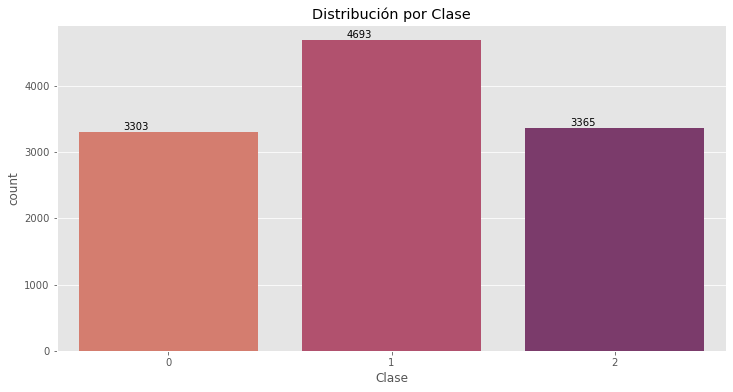

In [6]:
plt.style.use('ggplot')
Frecuencia = Ind.groupby('Clase').sum()
plt.figure(figsize=(12,6))
graf = sns.countplot(Ind['Clase'],palette='flare')
plt.title('Distribución por Clase')
for p in graf.patches:
    graf.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
plt.show()

In [7]:
X = np.array(Ind.drop(['Clase','IPCM'],1))
Y = np.array(Ind['Clase'])
feature_names = Ind.drop(['Clase','IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
feature_names
# X = Individuos.drop(['Clase','IPCM'],1)
# Y = Individuos['Clase']

C:\Users\jlope\AppData\Local\Temp/ipykernel_16124/1491399619.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(Ind.drop(['Clase','IPCM'],1))
C:\Users\jlope\AppData\Local\Temp/ipykernel_16124/1491399619.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feature_names = Ind.drop(['Clase','IPCM'],1)


array(['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10', 'I_19', 'I_21_1',
       'I_21_2', 'I_21_3', 'I_22', 'I_23', 'I_24', 'I_26_1', 'I_26_2',
       'I_26_3', 'I_27', 'I_28_1', 'I_29', 'I_32', 'I_33', 'I_40_1',
       'I_40_2', 'I_40_3', 'I_40_4', 'I_40_5', 'I_90_1', 'I_90_2',
       'I_90_3', 'I_90_4', 'I_90_5', 'I_90_6', 'I_90_7', 'I_90_8',
       'I_90_9', 'I_90_10', 'I_31', 'I_35_1', 'I_38', 'I_51_2', 'I_51_3',
       'I_51_4', 'I_52', 'I_54', 'I_55', 'I_48_1', 'I_48_2', 'I_48_3',
       'I_48_4', 'I_48_5', 'I_48_6', 'I_48_7', 'I_48_8', 'I_48_9',
       'I_91_1', 'I_91_2', 'I_91_3', 'I_91_4', 'I_91_5', 'I_91_6',
       'I_91_7', 'I_91_8', 'I_91_9', 'I_91_10', 'I_30', 'I_41', 'I_44',
       'I_45', 'I_47'], dtype=object)

In [8]:
X = pd.DataFrame(X, columns=feature_names)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [10]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [11]:
params = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression(class_weight='balanced')
lr_gs = GridSearchCV(lr, params, cv=skf, n_jobs=-1, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\jlope\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.41096577 0.6317918         nan 0.82935285 0.83815535        nan
 0.83903569 0.84155126        nan 0.84243113 0.84356305        nan
 0.84607877 0.84431792        nan 0.84783954 0.84620463        nan
 0.84809064 0.84595306        nan 0.8499768  0.84658176        nan
 0.8512341  0.84695896        nan 0.85098269 0.84695896        nan
 0.8514856  0.847336          nan 0.85110816 0.84796453        nan
 0.85135973 0.84884456        nan 0.85148544 0.84859307        nan
 0.85085643 0.84846744        nan 0.85035344 0.84846744        nan
 0.85060501 0.84871885        nan 0.85060501 0.84871885        nan
 0.85085651 0.84909613        nan 0.85073088 0.84922184        nan
 0.84985061 0.84897027        nan 0.84997624 0.84897035        nan
 0.84934755 0.84909606        nan 0.84972483 0.84897027        nan
 0.84997632 0.84897043        nan 0.8503536  0.848970

In [12]:
print("Mejores parámetros", lr_gs.best_params_)
print("Mejor estimador", lr_gs.best_estimator_)

Mejores parámetros {'C': 0.1010280808080808, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor estimador LogisticRegression(C=0.1010280808080808, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [13]:
lr = LogisticRegression(C= 0.1010280808080808, penalty= 'l1', solver= 'liblinear', class_weight='balanced')
# scores = cross_val_predict(lr, X_test, y_test, cv=skf)
# scores

lr.fit(X_train,y_train)
init_lr = time.time()
time_lr = time.time()-init_lr
lr_y_pred = lr.predict(X_test)
lr_y_pred

array([2, 0, 1, ..., 0, 1, 0], dtype=uint16)

In [14]:
matriz_lr = confusion_matrix(y_test, lr_y_pred)
print('Matriz de Confusión:')
print(matriz_lr)

Matriz de Confusión:
[[ 760   80  149]
 [  48 1357   20]
 [ 152   36  807]]


Text(0.5, 15.0, 'Predicción')

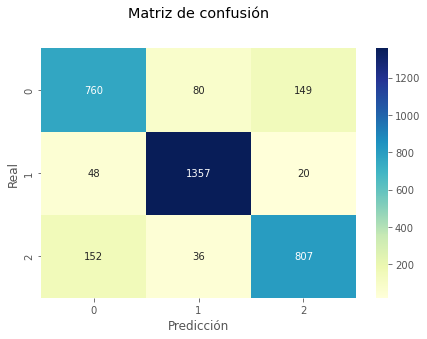

In [15]:
sns.heatmap(pd.DataFrame(matriz_lr), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [16]:
precision_lr = precision_score(y_test, lr_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_lr)
 
accuracy_lr = accuracy_score(y_test, lr_y_pred)
print('Exactitud del modelo:')
print(accuracy_lr)
 
recall_lr = recall_score(y_test, lr_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_lr)

f1_lr = f1_score(y_test, lr_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_lr)

Precisión del modelo:
0.8577295394543855
Exactitud del modelo:
0.8577295394543855
Exhaustividad del modelo:
0.8577295394543855
Valor F1 del modelo:
0.8577295394543855


In [17]:
clas_lr = classification_report(y_test, lr_y_pred, zero_division = 1)
print(clas_lr)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       989
           1       0.92      0.95      0.94      1425
           2       0.83      0.81      0.82       995

    accuracy                           0.86      3409
   macro avg       0.85      0.84      0.85      3409
weighted avg       0.86      0.86      0.86      3409



In [18]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=skf, n_jobs=-1, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [19]:
print("Mejores parámetros", gs_rfc.best_params_)
print("Mejor estimador", gs_rfc.best_estimator_)

Mejores parámetros {'max_features': 'log2', 'n_estimators': 500}
Mejor estimador RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=500)


In [20]:
rfc = RandomForestClassifier(max_features= 'log2', n_estimators= 500, class_weight='balanced')

init_rf = time.time()
rfc.fit(X_train,y_train)
time_rf = time.time()-init_rf
rfc_y_pred = rfc.predict(X_test)
rfc_y_pred

array([2, 0, 1, ..., 0, 1, 2], dtype=uint16)

In [21]:
matriz_rfc = confusion_matrix(y_test, rfc_y_pred)
print('Matriz de Confusión:')
print(matriz_rfc)

Matriz de Confusión:
[[ 840   64   85]
 [  16 1367   42]
 [ 111   51  833]]


Text(0.5, 15.0, 'Predicción')

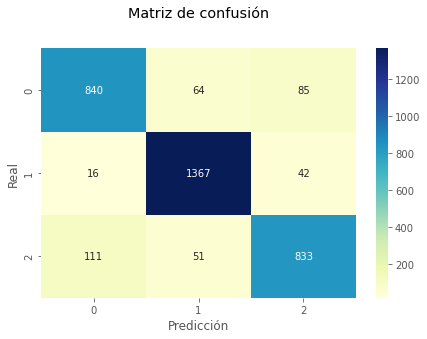

In [22]:
sns.heatmap(pd.DataFrame(matriz_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [23]:
precision_rfc = precision_score(y_test, rfc_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_rfc)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print('Exactitud del modelo:')
print(accuracy_rfc)

recall_rfc = recall_score(y_test, rfc_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_rfc)

f1_rfc = f1_score(y_test, rfc_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_rfc)

Precisión del modelo:
0.8917571135230273
Exactitud del modelo:
0.8917571135230273
Exhaustividad del modelo:
0.8917571135230273
Valor F1 del modelo:
0.8917571135230273


In [24]:
clas_rfc = classification_report(y_test, rfc_y_pred, zero_division = 1)
print(clas_rfc)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       989
           1       0.92      0.96      0.94      1425
           2       0.87      0.84      0.85       995

    accuracy                           0.89      3409
   macro avg       0.89      0.88      0.88      3409
weighted avg       0.89      0.89      0.89      3409



In [25]:
svm = SVC(class_weight='balanced')
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gs_svm = GridSearchCV(svm, param_grid, cv=skf, n_jobs=-1, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [26]:
print("Mejores parámetros", gs_svm.best_params_)
print("Mejor estimador", gs_svm.best_estimator_)

Mejores parámetros {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Mejor estimador SVC(C=1000, class_weight='balanced', gamma=0.0001)


In [27]:
svm = SVC(C=100, class_weight='balanced', gamma=0.0001)
init_svm= time.time()
svm.fit(X_train,y_train)
time_svm=time.time()-init_svm
svm_y_pred = svm.predict(X_test)
svm_y_pred

array([2, 0, 1, ..., 0, 1, 0], dtype=uint16)

In [28]:
matriz_svm = confusion_matrix(y_test, svm_y_pred)
print('Matriz de Confusión:')
print(matriz_svm)

Matriz de Confusión:
[[ 790   57  142]
 [  61 1320   44]
 [ 143   19  833]]


Text(0.5, 15.0, 'Predicción')

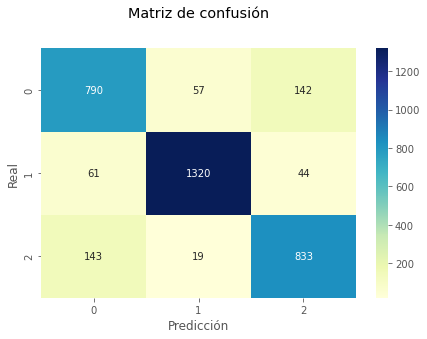

In [29]:
sns.heatmap(pd.DataFrame(matriz_svm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [30]:
precision_svm = precision_score(y_test, svm_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_svm)

accuracy_svm = accuracy_score(y_test, svm_y_pred)
print('Exactitud del modelo:')
print(accuracy_svm)

recall_svm = recall_score(y_test, svm_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_svm)

f1_svm = f1_score(y_test, svm_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_svm)

Precisión del modelo:
0.8633030214139044
Exactitud del modelo:
0.8633030214139044
Exhaustividad del modelo:
0.8633030214139044
Valor F1 del modelo:
0.8633030214139044


In [31]:
clas_svm = classification_report(y_test, svm_y_pred, zero_division = 1)
print(clas_svm)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       989
           1       0.95      0.93      0.94      1425
           2       0.82      0.84      0.83       995

    accuracy                           0.86      3409
   macro avg       0.85      0.85      0.85      3409
weighted avg       0.86      0.86      0.86      3409



In [32]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': (3, 5, 10),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev', 'euclidean', 'manhattan')
    }
gs_knn = GridSearchCV(knn, param_grid, cv=skf, n_jobs=-1, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [33]:
print("Mejores parámetros", gs_knn.best_params_)
print("Mejor estimador", gs_knn.best_estimator_)

Mejores parámetros {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Mejor estimador KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance')


In [34]:
knn = KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance', metric='minkowski')

init_knn= time.time()
knn.fit(X_train,y_train)
time_knn=time.time()-init_knn
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([2, 0, 1, ..., 0, 1, 2], dtype=uint16)

In [35]:
matriz_knn = confusion_matrix(y_test, knn_y_pred)
print('Matriz de Confusión:')
print(matriz_knn)

Matriz de Confusión:
[[ 669  125  195]
 [  23 1306   96]
 [  85  248  662]]


Text(0.5, 15.0, 'Predicción')

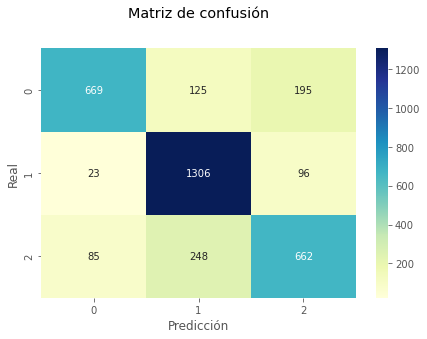

In [36]:
sns.heatmap(pd.DataFrame(matriz_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [37]:
precision_knn = precision_score(y_test, knn_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_knn)

accuracy_knn = accuracy_score(y_test, knn_y_pred)
print('Exactitud del modelo:')
print(accuracy_knn)

recall_knn = recall_score(y_test, knn_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_knn)

f1_knn = f1_score(y_test, knn_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_knn)

Precisión del modelo:
0.7735406277500734
Exactitud del modelo:
0.7735406277500734
Exhaustividad del modelo:
0.7735406277500734
Valor F1 del modelo:
0.7735406277500734


In [38]:
clas_knn = classification_report(y_test, knn_y_pred, zero_division = 1)
print(clas_knn)

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       989
           1       0.78      0.92      0.84      1425
           2       0.69      0.67      0.68       995

    accuracy                           0.77      3409
   macro avg       0.78      0.75      0.76      3409
weighted avg       0.78      0.77      0.77      3409



In [39]:
#tiempo de entrenamiento Regresión logística
print("tiempo de entrenamiento Regresión logística : ", time_lr/60)
#tiempo de entrenamiento Random Forest
print("tiempo de entrenamiento Random Forest:" , time_rf/60)
#tiempo de entrenamiento SVM
print("tiempo de entrenaiento SVM :",time_svm/60)
#tiempo de entrenamiento KNN
print("tiempo de entrenamiento KNN : ", time_knn/60)

tiempo de entrenamiento Regresión logística :  0.0
tiempo de entrenamiento Random Forest: 0.0705733855565389
tiempo de entrenaiento SVM : 0.04453826347986857
tiempo de entrenamiento KNN :  6.6681702931722e-05
